In [53]:
from netCDF4 import Dataset
import xarray as xr
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs

import numpy as np 
import pandas as pd 
from time import time 
import scipy 
import h5py 


TRAIN_MONTHS = pd.date_range(start='1981-01-01', end='2014-12-01', freq='MS')
VAL_MONTHS = pd.date_range(start='2015-01-01', end='2018-12-01', freq='MS')
TEST_MONTHS = pd.date_range(start='2019-01-01', end='2024-06-01', freq='MS')
DATA_DIRECTORY = '/oak/stanford/groups/earlew/yuchen'
SPS_GRID = xr.open_dataset(os.path.join(DATA_DIRECTORY, 'NSIDC/sps_grid.nc'))

def read_hdf5_file(data_path, data_name, load=True):
    with h5py.File(data_path, 'r') as f:
        return f[data_name][()]

siconc_anom_da = xr.open_dataset(f"{DATA_DIRECTORY}/sicpred/normalized_inputs/siconc_anom.nc").siconc
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


cmap = plt.cm.RdBu_r
white_region_fraction = 0.02
colors = cmap(np.linspace(0, 1, 256))
center = 128
white_width = int(white_region_fraction * 256)
colors[center - white_width // 2:center + white_width // 2] = [1, 1, 1, 1]
RdBu_rw = mcolors.LinearSegmentedColormap.from_list('RdBu_r_with_white', colors)



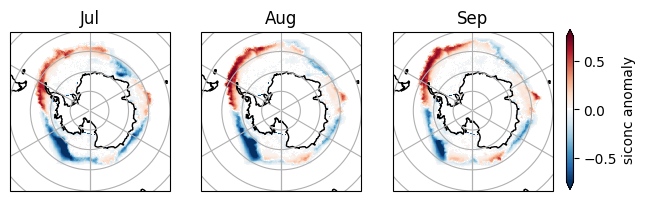

In [55]:
lat = SPS_GRID['latitude'].values
lon = SPS_GRID['longitude'].values

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(7, 4), subplot_kw={'projection': ccrs.SouthPolarStereo()})

for i in range(3):
    data_subset = siconc_anom_da.isel(time=20+i)
    ax = axs[i] 
    mesh = ax.pcolormesh(
        lon, lat, data_subset.values,
        transform=ccrs.PlateCarree(), 
        cmap=RdBu_rw,
        vmin=-0.75, vmax=0.75
    )

    ax.coastlines()
    ax.gridlines(draw_labels=False)
    ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
    ax.set_title(f"{months[data_subset.time.month.values - 1]}")

cbar_ax = fig.add_axes([0.92, 0.3, 0.01, 0.4]) 

# Add the colorbar to the created axis
cbar = fig.colorbar(mesh, cax=cbar_ax, orientation='vertical', extend='both')
cbar.set_label('siconc anomaly')

# Show the plot
plt.savefig("../figures/illustrations/anomaly_persistence.jpg", dpi=300, bbox_inches='tight')

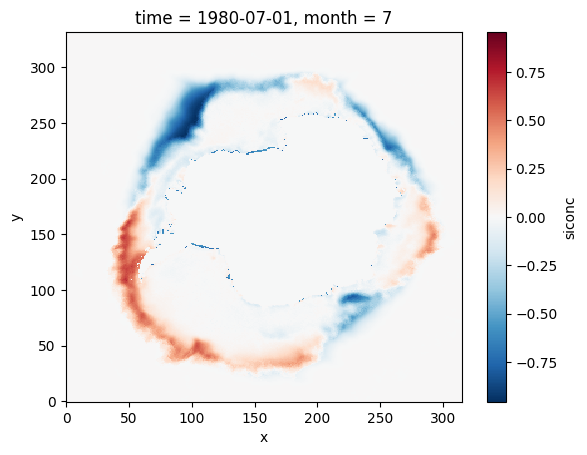

In [4]:
siconc_anom_da.isel(time=20).plot()